# Exploratory Data Analysis On Dacha Resort booking between 2011 - 2013

### Table of Contents

1. Import libraries

2. Extract and Read Data

3. Quick Overview of Data

4. Data preparation

5. Descriptive Statistics

6. Exploratory Data Analysis including various charts
    - Bookings by Market Segment
    - Bookings by Distribution Channel
    - Change Column Name - Converting Values Of The "meal" column
    - Bookings by Meals
    - Bookings by Customers type
    - Bookings by type of Guest
    - Bookings by Deposit Types
    - Bookings by Reservation Status
    - Bookings by Total Nights stayed by Guests
    - Total Nights Stayed by Guests in Hotel
    - Visitors from Top 20 Countries
    - Bookings by Lead Time
    - Number of Bookings per Year
    - Number of Bookings per Month
    -

7. Remove columns

8. Correlations
    - Correlation Matrix
    - Heat Map


### 1. Import libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew,kurtosis
import pylab as py
import time
import datetime
from datetime import datetime
from datetime import date

### 2. Extract and Read Data

In [100]:
df = pd.read_csv('resort_bookings.csv', delimiter=',', header='infer')

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2011,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2011
1,Resort Hotel,0,737,2011,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2011
2,Resort Hotel,0,7,2011,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2011
3,Resort Hotel,0,13,2011,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2011
4,Resort Hotel,0,14,2011,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2011


In [101]:
df.shape

(40060, 32)

### 3. Quick Overview of Data

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           40060 non-null  object 
 1   is_canceled                     40060 non-null  int64  
 2   lead_time                       40060 non-null  int64  
 3   arrival_date_year               40060 non-null  int64  
 4   arrival_date_month              40060 non-null  object 
 5   arrival_date_week_number        40060 non-null  int64  
 6   arrival_date_day_of_month       40060 non-null  int64  
 7   stays_in_weekend_nights         40060 non-null  int64  
 8   stays_in_week_nights            40060 non-null  int64  
 9   adults                          40060 non-null  int64  
 10  children                        40060 non-null  int64  
 11  babies                          40060 non-null  int64  
 12  meal                            

### 4. Data Preparation

Search for any missing (null) values in the records

In [104]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8209
company                           36952


Fill the missing values in "agent" and "company" columns

In [105]:
df["agent"].fillna(0, inplace = True)
df["company"].fillna(0, inplace = True)



Validation to confirm that there are no null values left. The result should be 0

In [109]:
df.isnull().sum().sort_values().sum()

0

Determine Total Nights Stayed by Guests

In [110]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

### 5. Descriptive Statistics

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,40060.0,0.277634,0.447837,0.00,0.0,0.0,1.0,1.0
lead_time,40060.0,92.675686,97.285315,0.00,10.0,57.0,155.0,737.0
arrival_date_year,40060.0,2012.121443,0.722347,2011.00,2012.0,2012.0,2013.0,2013.0
arrival_date_week_number,40060.0,27.140864,14.005441,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,40060.0,15.821243,8.883708,1.00,8.0,16.0,24.0,31.0
stays_in_weekend_nights,40060.0,1.189815,1.147812,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,40060.0,3.128732,2.461329,0.00,1.0,3.0,5.0,50.0
adults,40060.0,1.867149,0.697285,0.00,2.0,2.0,2.0,55.0
children,40060.0,0.128682,0.445195,0.00,0.0,0.0,0.0,10.0
babies,40060.0,0.013904,0.118998,0.00,0.0,0.0,0.0,2.0


### 6. Exploratory Data Analysis

Bookings by Market Segment

Online TA        17729
Offline TA/TO     7472
Direct            6513
Groups            5836
Corporate         2309
Complementary      201
Name: market_segment, dtype: int64

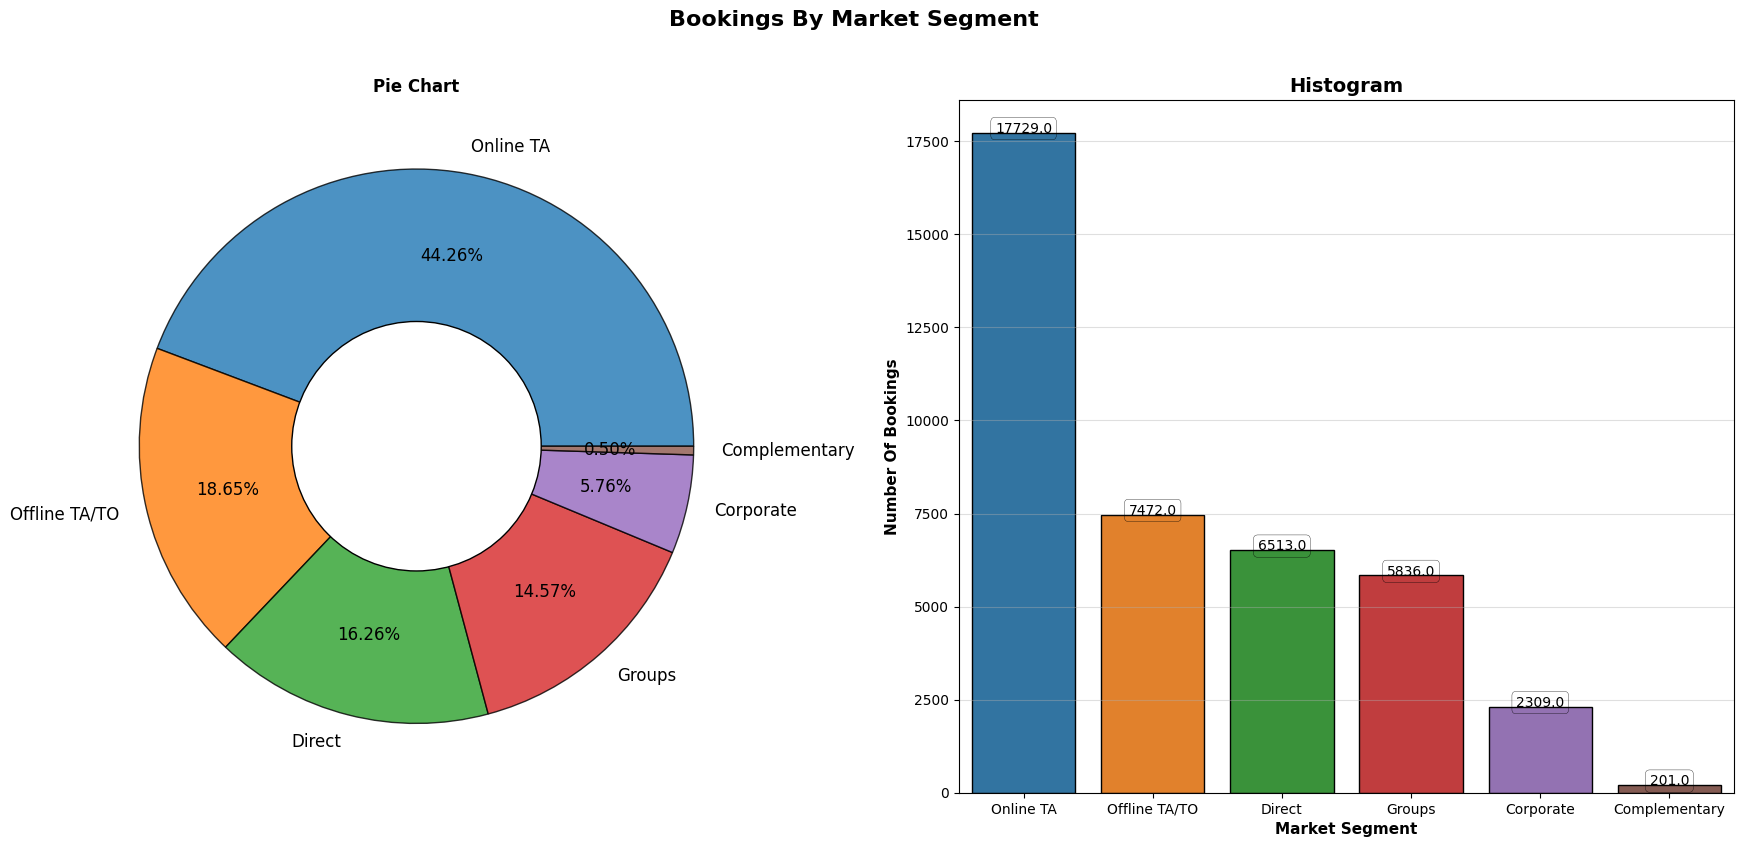

In [117]:
labels = ["Online TA", "Offline TA/TO", "Direct", "Groups", "Corporate", "Complementary"]
order = df['market_segment'].value_counts().index
plt.figure(figsize = (22, 9))
plt.suptitle('Bookings By Market Segment', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["market_segment"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12})
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "market_segment", data = df, order = order, edgecolor = "black",)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Market Segment", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df['market_segment'].value_counts()

Bookings by Distribution Channel

TA/TO        28925
Direct        7865
Corporate     3269
Undefined        1
Name: distribution_channel, dtype: int64

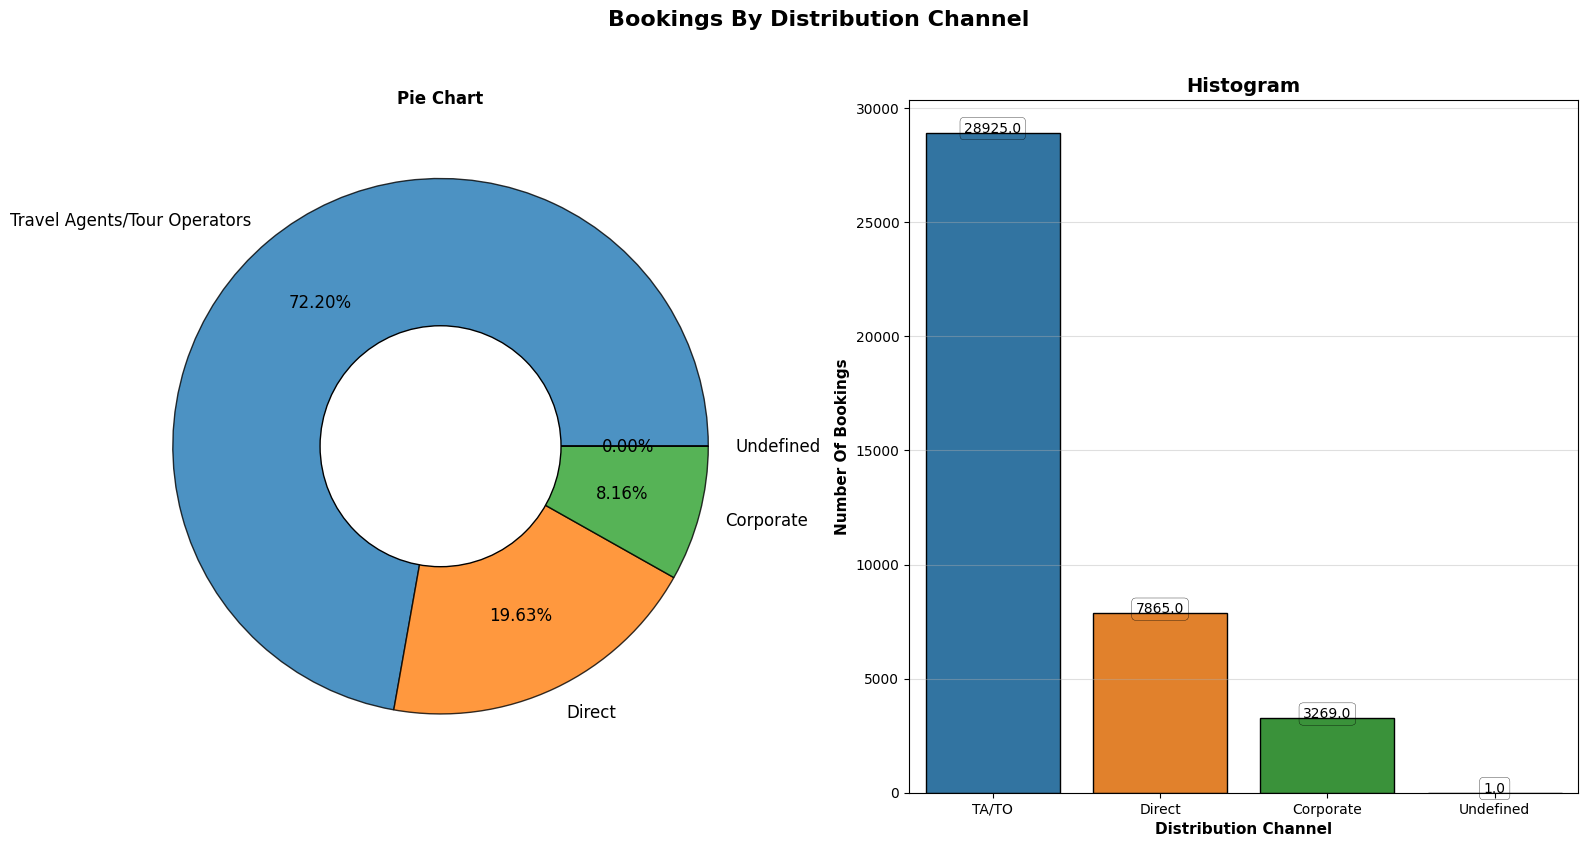

In [120]:
colors = ["#8B7D6B", "#000000", "#CDB79E", "#FFE4C4"]
labels = ["Travel Agents/Tour Operators", "Direct", "Corporate", "Undefined"]
order = df['distribution_channel'].value_counts().index
plt.figure(figsize = (19, 9))
plt.suptitle('Bookings By Distribution Channel', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["distribution_channel"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels, #colors = colors,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12})
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "distribution_channel", data = df, order = order, edgecolor = "black") #, palette = colors
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Distribution Channel", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df['distribution_channel'].value_counts()

Change Column Name - Converting Values Of The "meal" column

In [36]:
df["meal"].replace(["Undefined", "BB", "FB", "HB", "SC" ], 
["No Meal", "Breakfast", "Full Board", "Half Board", "No Meal"], inplace = True)

Bookings by Meals

Breakfast     30005
Half Board     8046
No Meal        1255
Full Board      754
Name: meal, dtype: int64

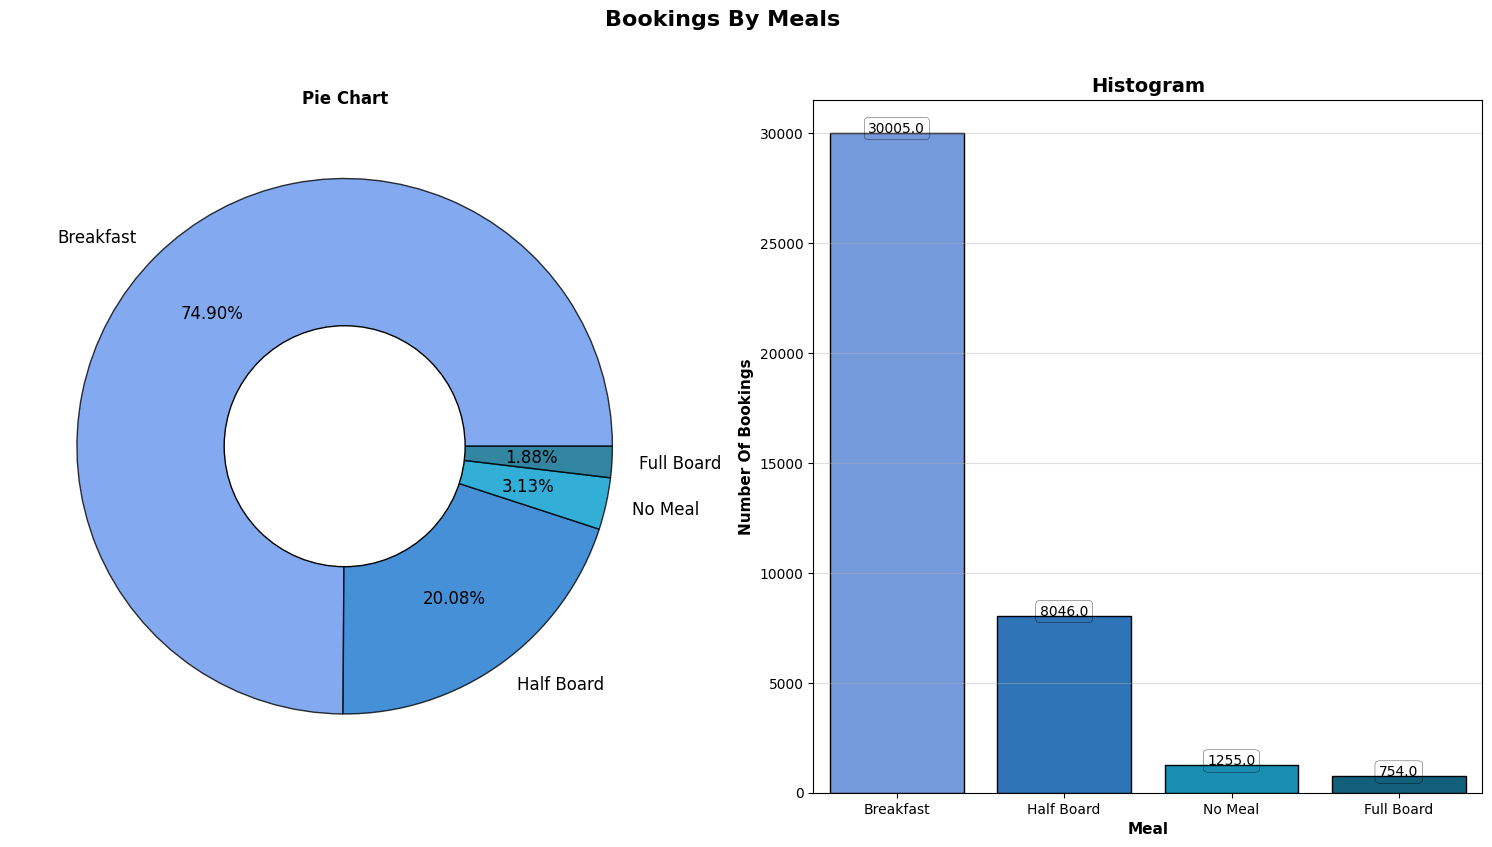

In [40]:
colors = ["#6495ED", "#1874CD", "#009ACD", "#00688B"]
labels = ["Breakfast", "Half Board", "No Meal", "Full Board"]
order = df['meal'].value_counts().index
plt.figure(figsize = (19, 9))
plt.suptitle('Bookings By Meals', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["meal"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels, colors = colors,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12})
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "meal", data = df, order = order, edgecolor = "black", palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Meal", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df['meal'].value_counts()

Bookings by Customers type

Transient          30209
Transient-Party     7791
Contract            1776
Group                284
Name: customer_type, dtype: int64

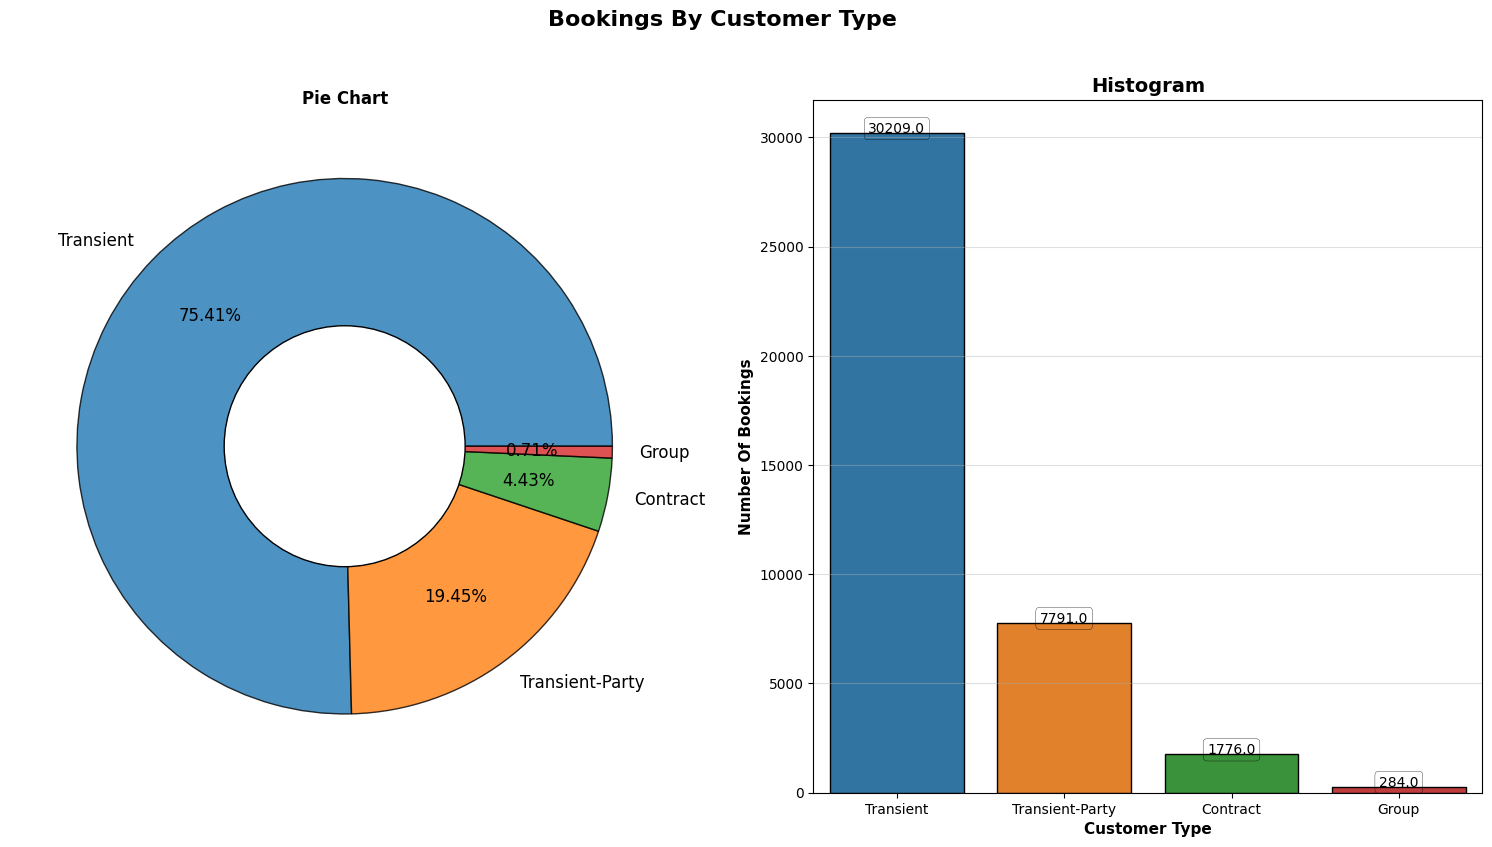

In [41]:
labels = ["Transient", "Transient-Party", "Contract", "Group"]
order = df['customer_type'].value_counts().index
plt.figure(figsize = (19, 9))
plt.suptitle('Bookings By Customer Type', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["customer_type"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12})
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "customer_type", data = df, order = order, edgecolor = "black")
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Customer Type", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df['customer_type'].value_counts()

Bookings by type of Guest

0    38282
1     1778
Name: is_repeated_guest, dtype: int64

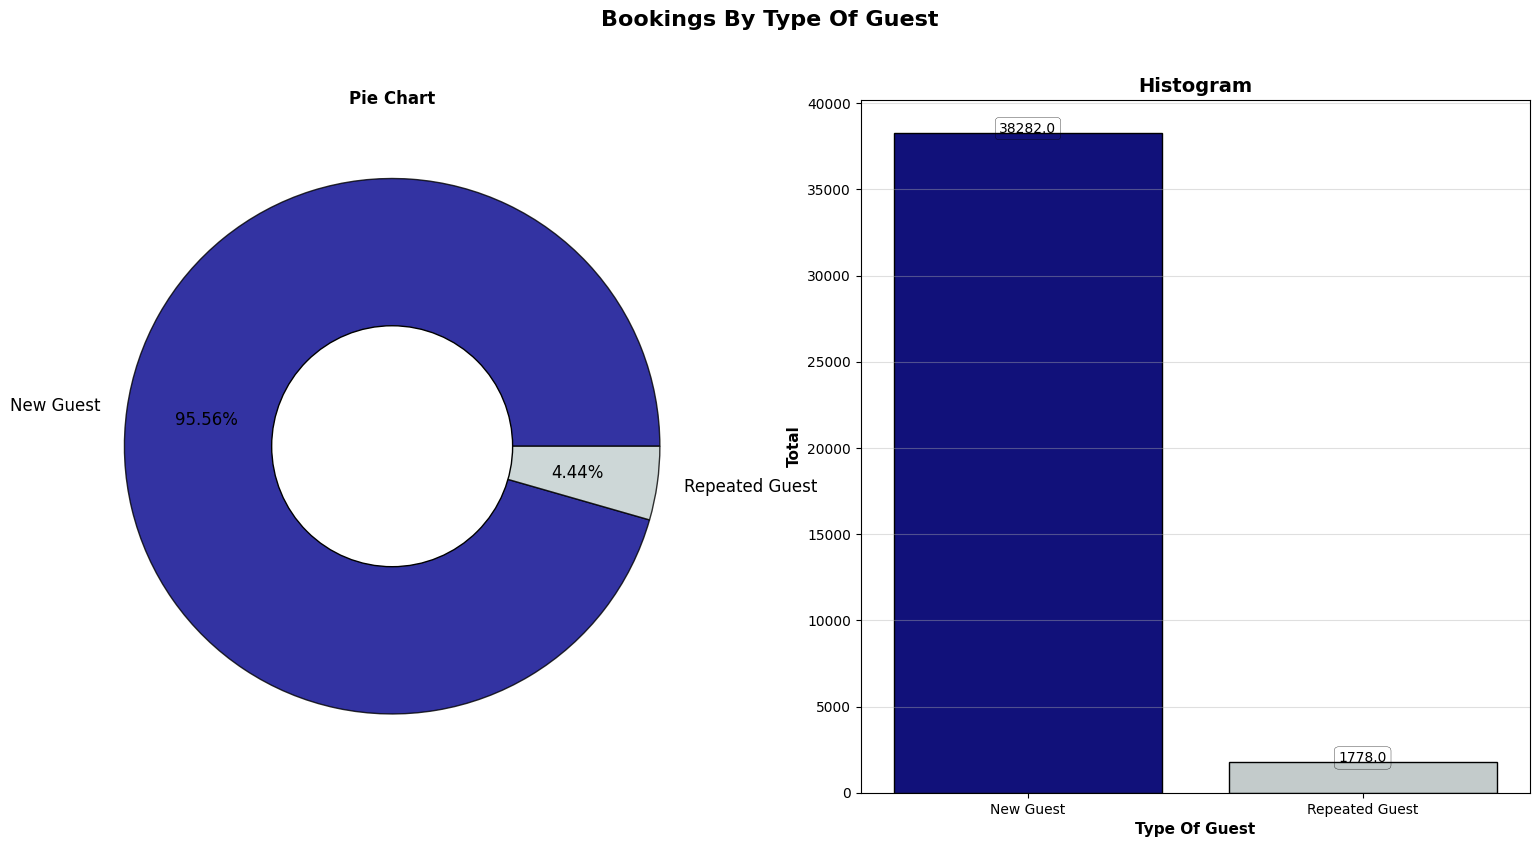

In [42]:
labels = ['New Guest', 'Repeated Guest']
colors = ["#00008B", "#C1CDCD"]
order = df['is_repeated_guest'].value_counts().index
plt.figure(figsize = (19, 9))
plt.suptitle('Bookings By Type Of Guest', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["is_repeated_guest"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12}, colors = colors)
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "is_repeated_guest", data = df, order = order, edgecolor = "black", palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Type Of Guest", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Total", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.xticks([0, 1], labels)
plt.grid(axis = "y", alpha = 0.4)

df['is_repeated_guest'].value_counts()

Bookings by Deposit Types

No Deposit    38199
Non Refund     1719
Refundable      142
Name: deposit_type, dtype: int64

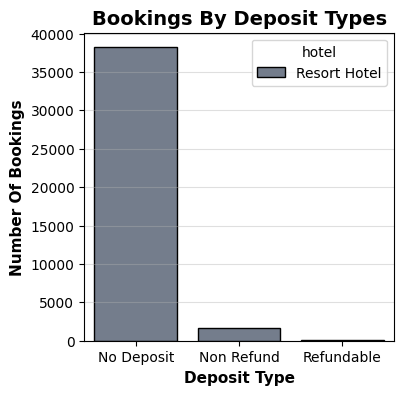

In [55]:
plt.figure(figsize = (4, 4))
order = sorted(df["deposit_type"].unique())
plt.title("Bookings By Deposit Types", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "deposit_type", data = df, hue = "hotel", edgecolor = "black", palette = "bone", order = order)
plt.xlabel("Deposit Type", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["deposit_type"].value_counts()

Bookings by Reservation Status

Check-Out    28938
Canceled     10831
No-Show        291
Name: reservation_status, dtype: int64

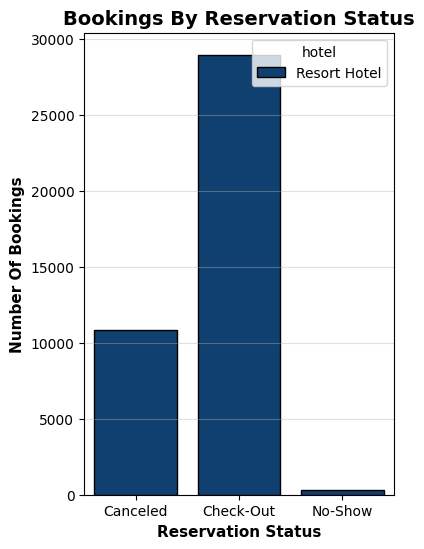

In [59]:
plt.figure(figsize = (4, 6))
order = sorted(df["reservation_status"].unique())
plt.title("Bookings By Reservation Status", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "reservation_status", data = df, hue = "hotel", edgecolor = "black", palette = "ocean", order = order)
plt.xlabel("Reservation Status", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["reservation_status"].value_counts()

Bookings by Total Nights stayed by Guests

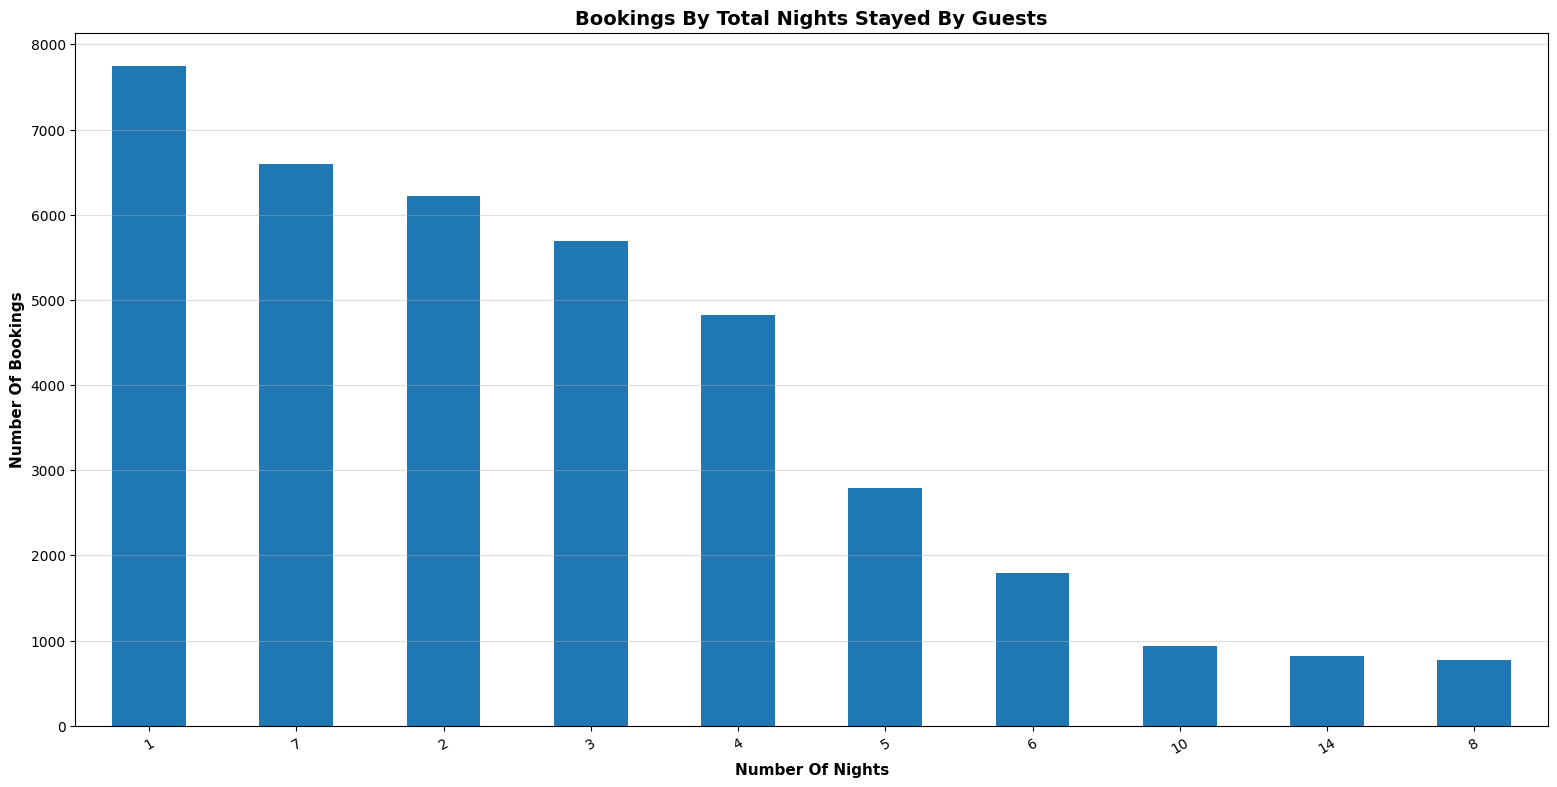

In [60]:
plt.figure(figsize = (19, 9))
df2 = df.groupby("total_nights")["total_nights"].count()
df2.sort_values(ascending = False)[: 10].plot(kind = 'bar')
plt.title("Bookings By Total Nights Stayed By Guests", fontweight = "bold", fontsize = 14, fontfamily = "sans-serif", 
color = 'black')
plt.xticks(rotation = 30)
plt.xlabel("Number Of Nights", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

Total Nights Stayed by Guests in Hotel

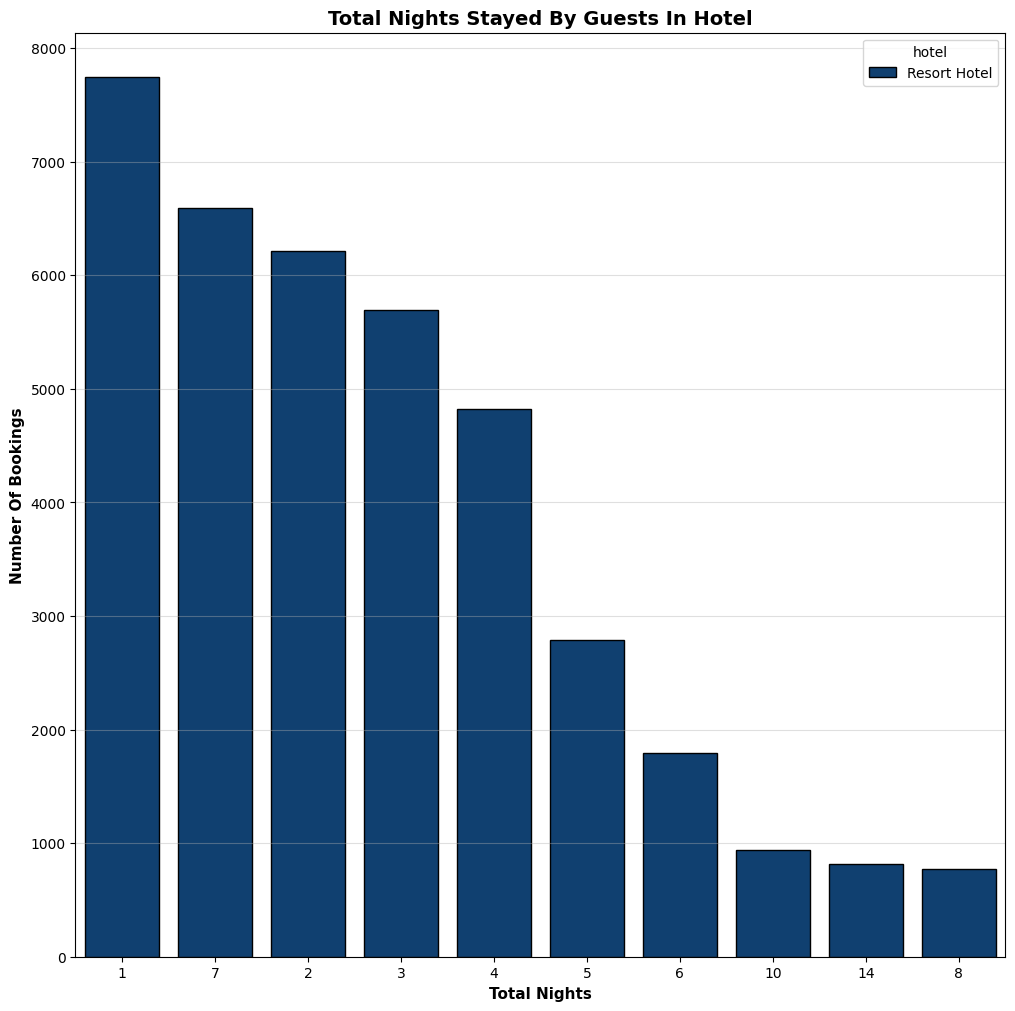

In [62]:
plt.figure(figsize = (12, 12))
order = df.total_nights.value_counts().iloc[:10].index
plt.title("Total Nights Stayed By Guests In Hotel", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "total_nights", data = df, hue = "hotel", edgecolor = "black", palette = "ocean", order = order)
plt.xlabel("Total Nights", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

Visitors from Top 20 Countries

THA    17636
GBR     6814
MAS     3957
RUS     2355
FRA     1611
       ...  
BIH        1
MUS        1
COM        1
UGA        1
DJI        1
Name: country, Length: 122, dtype: int64

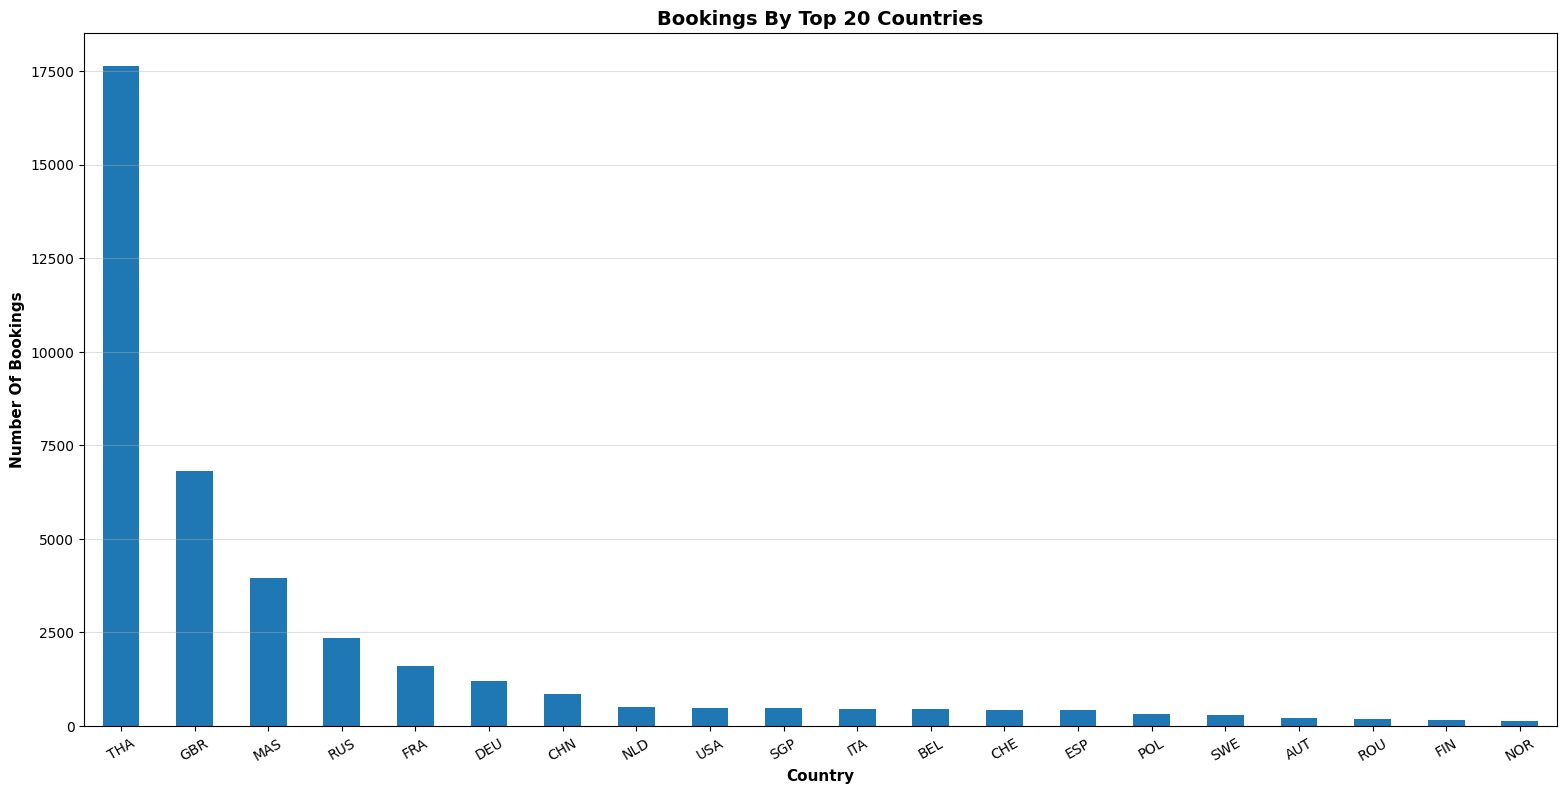

In [63]:
plt.figure(figsize = (19, 9))
df2 = df.groupby("country")["country"].count()
df2.sort_values(ascending = False)[: 20].plot(kind = 'bar')
plt.title("Bookings By Top 20 Countries", fontweight = "bold", fontsize = 14, fontfamily = "sans-serif", color = 'black')
plt.xticks(rotation = 30)
plt.xlabel("Country", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["country"].value_counts()

Bookings by Lead Time

count    40060.000000
mean        92.675686
std         97.285315
min          0.000000
25%         10.000000
50%         57.000000
75%        155.000000
max        737.000000
Name: lead_time, dtype: float64

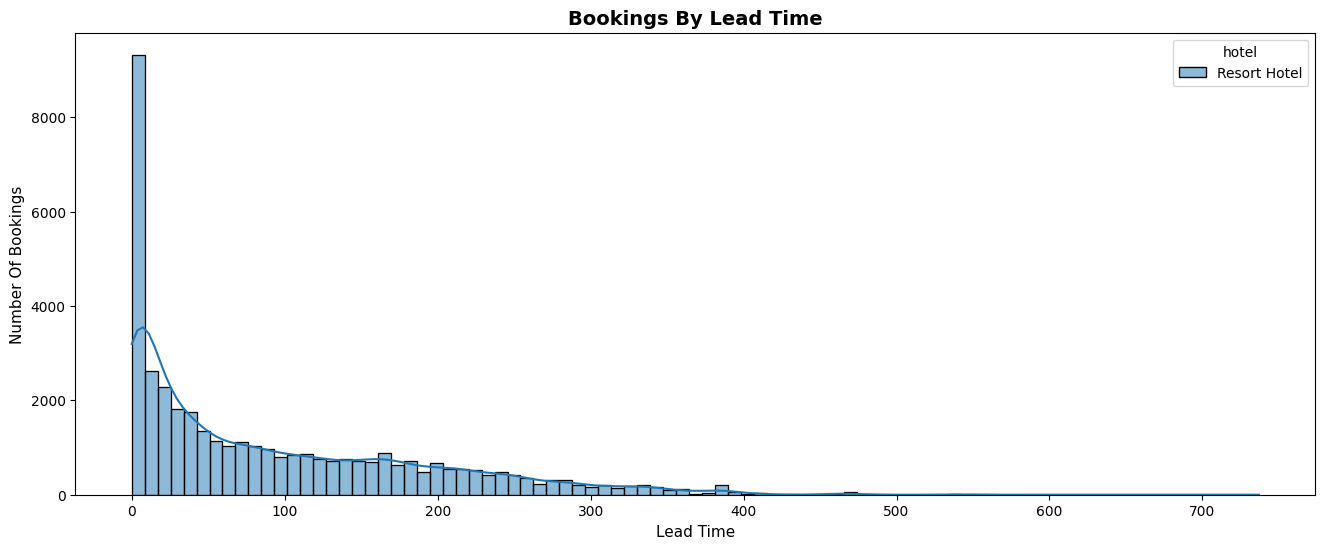

In [64]:
plt.figure(figsize = (16, 6))
plt.title("Bookings By Lead Time", fontweight = "bold", fontsize = 14, fontfamily = 'sans-serif', color = 'black')
sns.histplot(data = df, x = 'lead_time', hue = "hotel", kde = True, color = "#104E8B")
plt.xlabel('Lead Time', fontweight = 'normal', fontsize = 11, fontfamily = 'sans-serif', color = "black")
plt.ylabel('Number Of Bookings', fontweight = 'regular', fontsize = 11, fontfamily = "sans-serif", color = "black")

df["lead_time"].describe().T

Number of Bookings per Year

2012    18567
2013    13179
2011     8314
Name: arrival_date_year, dtype: int64

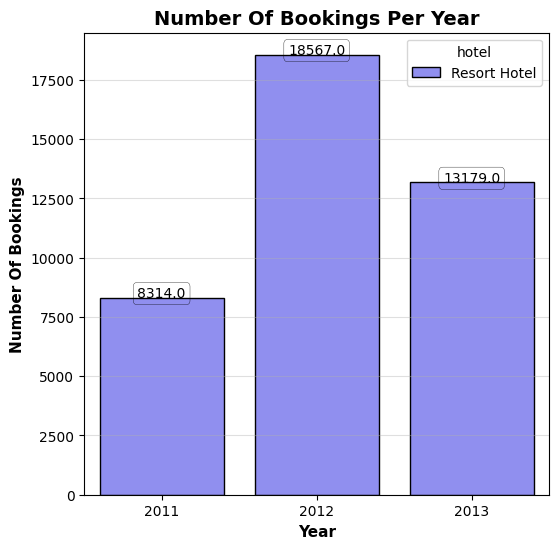

In [85]:
plt.figure(figsize = (6, 6))
plt.title("Number Of Bookings Per Year", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "arrival_date_year", data = df, hue = "hotel", edgecolor = "black", palette = "cool")
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Year", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["arrival_date_year"].value_counts()

Number of Bookings per Month

August       4894
July         4573
April        3609
May          3559
October      3555
March        3336
September    3108
February     3103
June         3045
December     2648
November     2437
January      2193
Name: arrival_date_month, dtype: int64

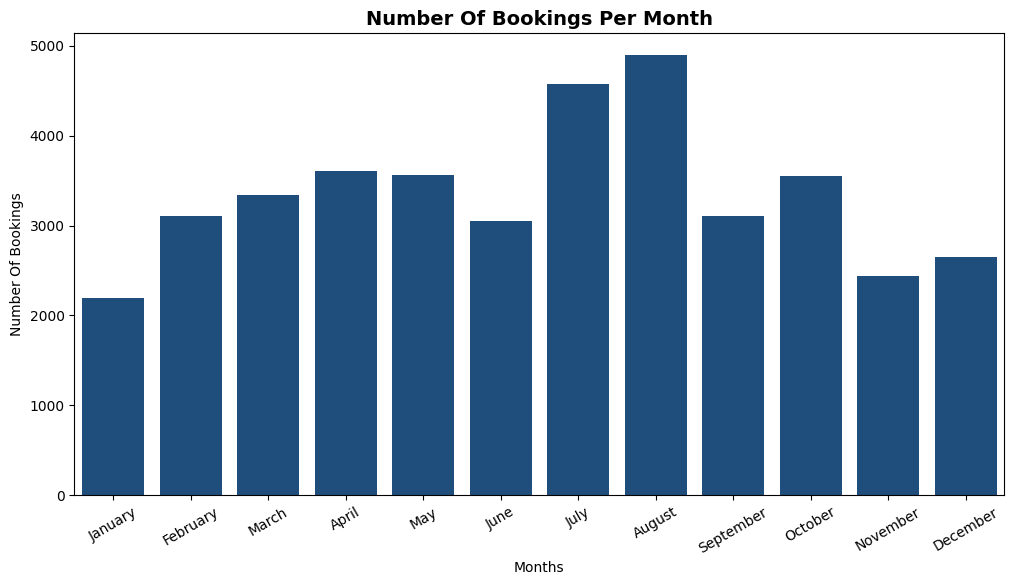

In [80]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
"November", "December"]

plt.figure(figsize = (12, 6))
plt.title("Number Of Bookings Per Month", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
d = df.groupby("arrival_date_month")["arrival_date_month"].count()
sns.barplot(x = d.index, y = d, order = months, color = "#104E8B")
plt.xticks(rotation = 30)
plt.xlabel("Months")
plt.ylabel("Number Of Bookings")

df["arrival_date_month"].value_counts()

### 7. Remove some columns before creating correlation heatmap

In [96]:
df_sub = df.drop(['is_canceled','arrival_date_week_number', 'arrival_date_day_of_month', 'previous_cancellations',
'previous_bookings_not_canceled', 'booking_changes', 'reservation_status_date', 'agent', 'company', 'days_in_waiting_list', 
'adults', 'babies', 'children'], axis = 1)

### 8. Correlations

Determine Correlation coefficients

In [97]:
corr_matrix = round(df_sub.corr(), 3)
"Correlation Matrix: "
corr_matrix

,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests,total_nights
lead_time,1.000,0.059,0.326,0.388,-0.150,0.030,-0.151,-0.008,0.393
arrival_date_year,0.059,1.000,0.020,0.013,0.072,0.128,-0.011,0.064,0.017
stays_in_weekend_nights,0.326,0.020,1.000,0.717,-0.120,0.104,-0.091,0.062,0.862
stays_in_week_nights,0.388,0.013,0.717,1.000,-0.130,0.120,-0.103,0.058,0.972
is_repeated_guest,-0.150,0.072,-0.120,-0.130,1.000,-0.106,0.055,0.001,-0.136
adr,0.030,0.128,0.104,0.120,-0.106,1.000,0.096,0.185,0.122
required_car_parking_spaces,-0.151,-0.011,-0.091,-0.103,0.055,0.096,1.000,0.075,-0.106
total_of_special_requests,-0.008,0.064,0.062,0.058,0.001,0.185,0.075,1.000,0.064
total_nights,0.393,0.017,0.862,0.972,-0.136,0.122,-0.106,0.064,1.000


Correlation between Variables

Text(0.03, 0.98, 'Correlation Between Variables')

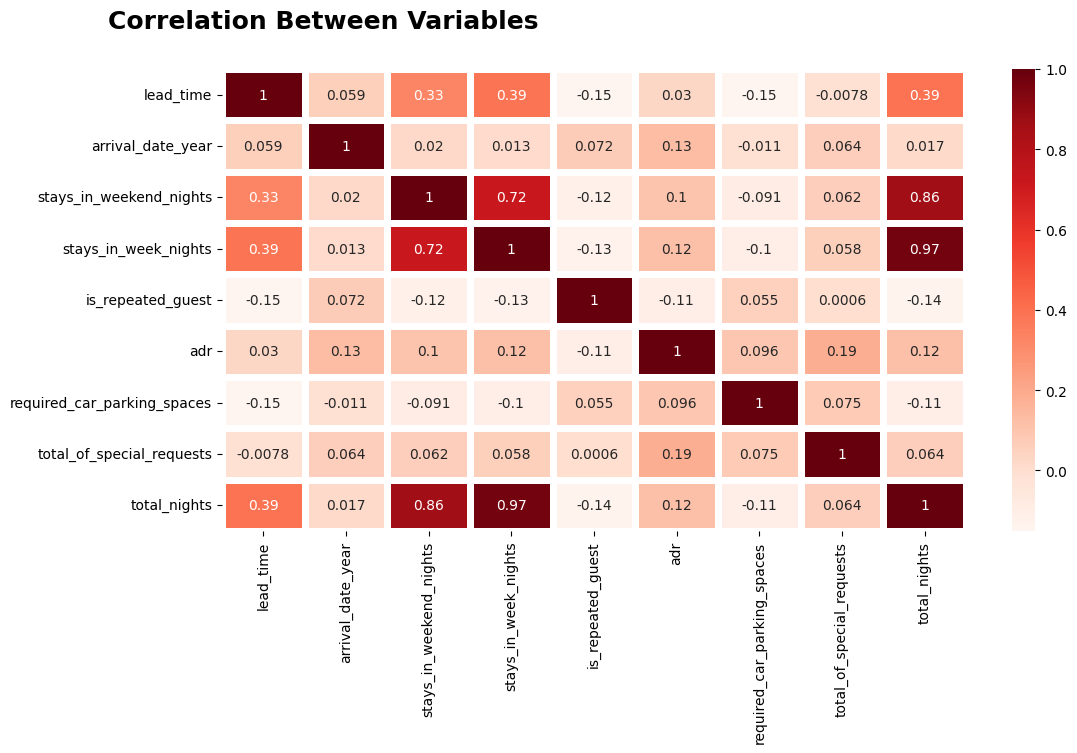

In [98]:
plt.rcParams['figure.figsize'] =(12, 6)
sns.heatmap(df_sub.corr(), annot=True, cmap='Reds', linewidths=5)
plt.suptitle('Correlation Between Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha = "left", fontsize='18', fontfamily='sans-serif', 
             color= "black")